## Climate Analysis and Exploration

Following analysis were done be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Created a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choosed a start date and end date for your trip, approximately 3-15 days total.

* Used SQLAlchemy `create_engine` to connect to your sqlite database.

* Used SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [110]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [111]:
!ls

clean_meas.csv
clean_measurements.csv
clean_station.csv
clean_stations.csv
climate_analysis.ipynb
data_engineering.ipynb
database_engineering.ipynb
hawaii.sqlite
images
merged_hawaii.csv
precipitation.png
README.md
Resources
sqlalchemy
temp_observation.png
trip_avg_temp.png


In [112]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [113]:
Base = automap_base()

In [114]:
Base.prepare(engine, reflect = True)

In [115]:
Base.classes.keys()

['measurement', 'station']

In [116]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [117]:
session = Session(engine)

In [118]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5b485c400>,
 'elevation': 3.0,
 'id': 0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [119]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5b4657828>,
 'date': '2010-01-01',
 'id': 0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

## Precipitation Analysis

* Designed a query to retrieve the last 12 months of precipitation data.

* Selected only the `date` and `prcp` values.

* Loaded the query results into a Pandas DataFrame and set the index to the date column.

* Ploted the results using the DataFrame `plot` method.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
dates = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(365).all()
s_dates = pd.DataFrame(dates)
s_dates.head(1)

,date,prcp
0,2017-08-23,0.08


In [122]:
s_dates.set_index('date', inplace=True)

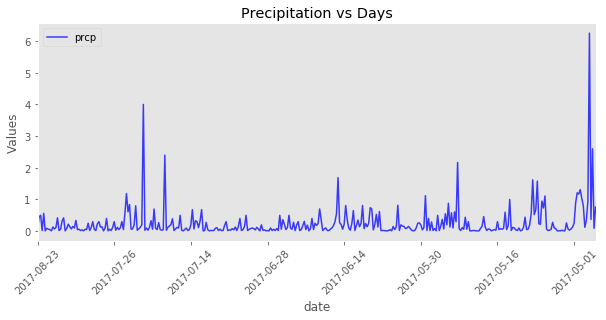

In [123]:
s_dates['prcp'].plot(figsize=(10,4), color = 'b', alpha = 0.75)
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.title('Precipitation vs Days')
plt.ylabel('Values')
plt.savefig('precipitation.png')
plt.show()

## Summary Statistics of precipitation data

In [124]:
prcp_data = session.query(Measurement.prcp).order_by(Measurement.date.desc()).all()
prcp_data = pd.DataFrame(prcp_data)
prcp_data.describe()

,prcp
count,9918.000000
mean,0.293217
std,0.601825
min,0.010000
25%,0.030000
50%,0.090000
75%,0.290000
max,11.530000


## Station Analysis

* Designed a query to calculate the total number of stations.

* Designed a query to find the most active stations.

  * Listed the stations and observation counts in descending order

  * Highest number of observations found

* Designed a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filtered by the station with the highest number of observations.

  * Ploted the results as a histogram with `bins=12`.

In [125]:
# Number of Stations

stations = session.query(Station.name).count()
print(f'There are total of {stations} stations in Hawaii'.format())

There are total of 9 stations in Hawaii


In [126]:
# Designed a query to find the most active stations

stations = session.query(Measurement.prcp, Measurement.station).order_by(Measurement.station.desc()).all()
stations = pd.DataFrame(stations)
most_active = stations['station'].value_counts()
most_active = pd.DataFrame(most_active)
most_active

,station
USC00519281,1973
USC00516128,1937
USC00513117,1765
USC00519523,1191
USC00514830,1114
USC00519397,919
USC00511918,534
USC00518838,256
USC00517948,229


In [127]:
# Designed a query to retrieve the last 12 months of temperature observation data (tobs).

last_tobs = session.query(Measurement.tobs, Measurement.station).order_by(Measurement.station.desc()).limit(365).all()
last_tobs = pd.DataFrame(last_tobs)
last_tobs.head()

,tobs,station
0,75.0,USC00519523
1,75.0,USC00519523
2,72.0,USC00519523
3,68.0,USC00519523
4,63.0,USC00519523


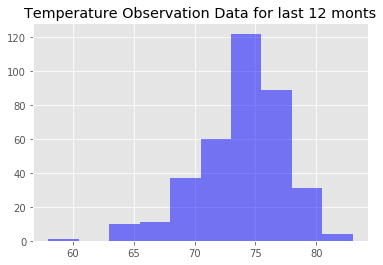

In [128]:
last_tobs.hist(column='tobs', color = 'b', alpha = 0.50)
plt.title('Temperature Observation Data for last 12 monts')
plt.savefig('temp_observation.png')
plt.show()

### Temperature Analysis

* Wrote a function called `calc_temps` that accepts a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Used the `calc_temps` function to calculates the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Ploted the min, avg, and max temperature from the previous query as a bar chart.

  * Used the average temperature as the bar height.

  * Used the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [129]:
from sqlalchemy import func

In [130]:
def calc_tmps(start_date, end_date):
    # start_date = input('Vacation Start Date: Year-Date-Month format ')
    # end_date = input('Vacation End Date: Year-Date-Month format ')
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [131]:
results = calc_tmps('2017-07-30', '2017-08-23')
values = results[0]
TMIN = values[0]
TMAX = values[1]
TAVG = values[2]

In [132]:
results

[(70.0, 83.0, 77.16216216216216)]

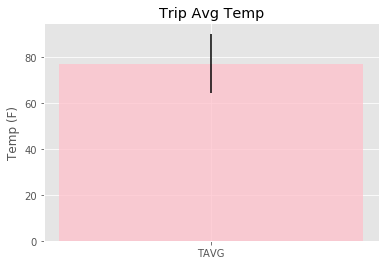

In [133]:
plt.style.use('ggplot')

x = ['TAVG']
data = [TAVG]
error =  TMAX - TMIN

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, data, yerr = error, color='pink', alpha=0.75, align='center')
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.xticks(x_pos, x)
plt.savefig('trip_avg_temp.png')
plt.show()

## Optional Recommended Analysis

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

  * Calcualte the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

  * Create a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

  * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

  * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

  * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

In [ ]:
def calc_tmps(spec_date):
    # start_date = input('Vacation Start Date: Year-Date-Month format ')
    # end_date = input('Vacation End Date: Year-Date-Month format ')
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.date == spec_date).all()

In [ ]:
results = calc_tmps('2012-02-28')
results

In [ ]:
TMIN = results[0][0]
TMAX = results[0][1]
TAVG = results[0][2]

### Routes

* `/api/v1.0/precipitation`

  * Queried for the dates and temperature observations from the last year.

  * Converted the query results to a Dictionary using `date` as the key and `tobs` as the value.

  * Returned the json representation of your dictionary.

* `/api/v1.0/stations`

  * Returned a json list of stations from the dataset.

* `/api/v1.0/tobs`

  * Returned a json list of Temperature Observations (tobs) for the previous year

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Returned a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.



In [135]:
temp_dates = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.station.desc()).limit(365).all()
temp_dates = pd.DataFrame(temp_dates)
temp_dates.head()

,date,tobs
0,2010-01-01,75.0
1,2010-01-05,75.0
2,2010-01-06,72.0
3,2010-01-07,68.0
4,2010-01-08,63.0


In [138]:
temp_dates_dict = dict(zip(temp_dates.date, temp_dates.tobs))
temp_dates_dict

{'2010-01-01': 75.0,
 '2010-01-05': 75.0,
 '2010-01-06': 72.0,
 '2010-01-07': 68.0,
 '2010-01-08': 63.0,
 '2010-01-09': 69.0,
 '2010-01-11': 68.0,
 '2010-01-21': 70.0,
 '2010-01-26': 76.0,
 '2010-01-27': 69.0,
 '2010-01-28': 71.0,
 '2010-01-29': 65.0,
 '2010-01-30': 69.0,
 '2010-01-31': 72.0,
 '2010-02-03': 65.0,
 '2010-02-05': 65.0,
 '2010-02-12': 70.0,
 '2010-02-17': 68.0,
 '2010-02-19': 63.0,
 '2010-02-20': 74.0,
 '2010-02-21': 66.0,
 '2010-02-22': 63.0,
 '2010-02-23': 63.0,
 '2010-02-27': 73.0,
 '2010-02-28': 69.0,
 '2010-03-01': 69.0,
 '2010-03-04': 69.0,
 '2010-03-05': 70.0,
 '2010-03-06': 72.0,
 '2010-03-08': 70.0,
 '2010-03-10': 72.0,
 '2010-03-11': 72.0,
 '2010-03-15': 71.0,
 '2010-03-16': 71.0,
 '2010-03-17': 69.0,
 '2010-03-18': 67.0,
 '2010-03-19': 68.0,
 '2010-03-24': 77.0,
 '2010-03-25': 73.0,
 '2010-03-26': 74.0,
 '2010-03-27': 77.0,
 '2010-03-28': 76.0,
 '2010-03-30': 73.0,
 '2010-04-01': 72.0,
 '2010-04-03': 72.0,
 '2010-04-04': 72.0,
 '2010-04-05': 72.0,
 '2010-04-06'

In [139]:
import json
with open('temp_dates_dict.json', 'w') as fp:
    json.dump(temp_dates_dict, fp)

## Return a json list of stations from the dataset.

In [145]:
stations_info = session.query(Station.name, Station.station ).all()
stations_info = pd.DataFrame(stations_info)
stations_info.head()

,name,station
0,"WAIKIKI 717.2, HI US",USC00519397
1,"KANEOHE 838.1, HI US",USC00513117
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830
3,"PEARL CITY, HI US",USC00517948
4,"UPPER WAHIAWA 874.3, HI US",USC00518838


In [146]:
stations_info_dict = dict(zip(stations_info.name, stations_info.station))
stations_info_dict

{'HONOLULU OBSERVATORY 702.2, HI US': 'USC00511918',
 'KANEOHE 838.1, HI US': 'USC00513117',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US': 'USC00514830',
 'MANOA LYON ARBO 785.2, HI US': 'USC00516128',
 'PEARL CITY, HI US': 'USC00517948',
 'UPPER WAHIAWA 874.3, HI US': 'USC00518838',
 'WAIHEE 837.5, HI US': 'USC00519281',
 'WAIKIKI 717.2, HI US': 'USC00519397',
 'WAIMANALO EXPERIMENTAL FARM, HI US': 'USC00519523'}

In [147]:
with open('stations_info_dict.json', 'w') as fp:
    json.dump(stations_info_dict, fp)